In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.shape

(13611, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

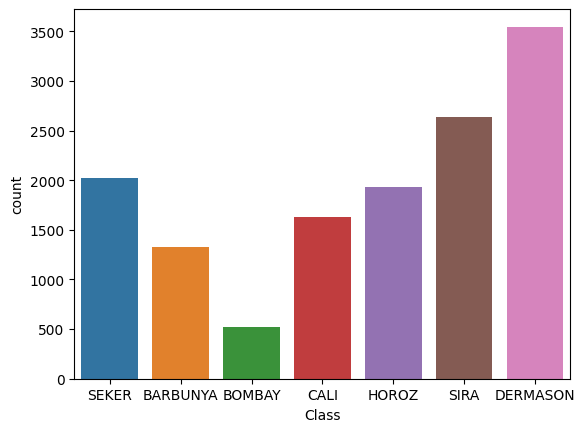

In [ ]:
sns.countplot(x='Class', data=df)

In [ ]:
# class_ = {'DERMASON':0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6}
# df['Class'] = df['Class'].replace(class_)

In [ ]:
# class_

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# co_relation = df.corr()
# co_relation["Class"].sort_values(ascending = False)

<ipython-input-16-9a1a8d92c823>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


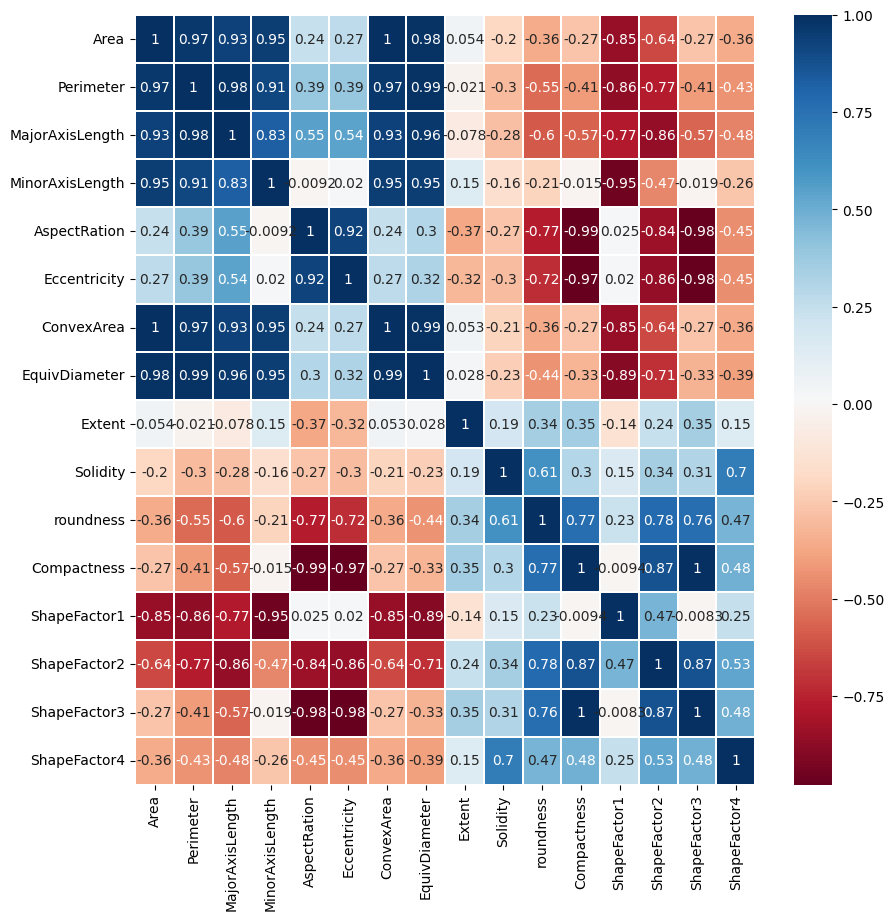

In [ ]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, linewidth=0.2,robust=True , cmap='RdBu')
plt.show()

In [ ]:
x = df.drop(columns=['Class'], axis=1)

y = df['Class']

In [ ]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [ ]:
y.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y)))])

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(13611, 16) (10888, 16) (2723, 16)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(13611,) (10888,) (2723,)


In [ ]:
Standardized_data = StandardScaler()

In [ ]:
Standardized_data.fit(x_train)
x_train = Standardized_data.transform(x_train)

In [ ]:
x_train[:-1]

array([[-0.40865341, -0.45097869, -0.37477393, ...,  0.00468897,
        -0.1323717 , -0.16695899],
       [-0.85523907, -1.04683579, -0.90842577, ...,  0.42253339,
        -0.36373034,  0.5793931 ],
       [-0.33488367, -0.33150817, -0.25105528, ..., -0.15517109,
        -0.26472598, -0.08222261],
       ...,
       [-0.72890369, -0.87150893, -0.90839711, ...,  0.85661596,
         0.44305347, -0.10175182],
       [ 0.07462902,  0.34492751,  0.67436922, ..., -1.15992078,
        -1.52432151, -0.13278127],
       [ 0.5027808 ,  0.7696124 ,  0.6135594 , ..., -0.6819623 ,
        -0.22731582,  0.4538221 ]])

In [ ]:
x_test = Standardized_data.transform(x_test)

In [ ]:
x_test[:-1]

array([[-2.10908095e-01, -9.68619783e-02,  1.21499112e-01, ...,
        -7.00439397e-01, -9.81858853e-01, -1.02324219e-01],
       [-5.24591943e-01, -6.97546695e-01, -9.58039827e-01, ...,
         1.80023217e+00,  2.04449421e+00,  6.93895713e-01],
       [-2.81155219e-01, -2.26389630e-01, -2.28006529e-01, ...,
        -1.11523712e-01, -1.23015466e-01, -3.62870608e-04],
       ...,
       [ 2.89638144e+00,  2.49628478e+00,  2.09278065e+00, ...,
        -1.02058919e+00,  6.04299850e-01, -2.24348818e-01],
       [-5.63203921e-01, -7.28680813e-01, -7.23802614e-01, ...,
         6.84182688e-01,  5.53506493e-01,  8.14563321e-01],
       [ 9.31342976e-01,  1.15970018e+00,  1.29286881e+00, ...,
        -1.19266368e+00, -9.36773409e-01, -8.45921578e-01]])

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
# Creating the LazyClassifier object
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# Fitting the model on the training data
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:47<00:00,  1.63s/it]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.93               0.94    None      0.93   
RandomForestClassifier             0.93               0.94    None      0.93   
LGBMClassifier                     0.93               0.94    None      0.93   
KNeighborsClassifier               0.92               0.94    None      0.92   
LogisticRegression                 0.93               0.94    None      0.93   
ExtraTreesClassifier               0.92               0.93    None      0.92   
BaggingClassifier                  0.92               0.93    None      0.92   
LinearSVC                          0.92               0.93    None      0.92   
CalibratedClassifierCV             0.92               0.93    None      0.92   
QuadraticDiscriminantAnalysis      0.92               0.93    None      0.92   
SGDClassifier                      0.92 

In [ ]:
model = svm.SVC(kernel = "linear")

In [ ]:
model.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
#prediction
training_data_prediction = model.predict(x_train)

#checking accuracy score
training_data_accuracy = accuracy_score(training_data_prediction, y_train)

print("This is the accuracy score for training data : ",training_data_accuracy)

This is the accuracy score for training data :  0.9285451873622337


In [ ]:
#prediction
test_data_prediction = model.predict(x_test)

#checking accuracy score
test_data_accuracy = accuracy_score(y_test, test_data_prediction)

print("This is the accuracy score for test data : ",test_data_accuracy)

This is the accuracy score for test data :  0.9250826294528094


In [ ]:

prediction = model.predict((np.array([[66377,1060.47,369.2427646,230.3727641,1.602805636,0.781499421,67927,290.7016599,0.744239244,0.977107777,0.741648281,0.787291418,0.005563231,0.001318415,0.619827078,0.993463455]])))
print(prediction)


['BOMBAY']
